In [37]:
import pandas as pd
import spacy
import en_core_web_sm
import en_core_web_lg
import umap.umap_ as umap
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
sys.path.append('.')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload

from ipynb.fs.full.data_processing import format_raw_df, get_split_by_author
from ipynb.fs.full.data_visualization import plot_embeddings

data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())

train_author, test_author = get_split_by_author(df[df['is_question']])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### TFIDF on N-Grams

In [2]:
questions = train_author[train_author['is_question']]
raw_text = questions['body_text']

#extracting the labels to use as a color on plot

sent_labels = questions['AcceptedAnswerId'].notna()
sent_labels.value_counts()

True     2907
False    2769
Name: AcceptedAnswerId, dtype: int64

In [3]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features = 2**21)

bag_of_words = vectorizer.fit_transform(raw_text)
bag_of_words.shape

(5676, 27381)

In [4]:
umap_embedder = umap.UMAP()
umap_bow = umap_embedder.fit_transform(bag_of_words)

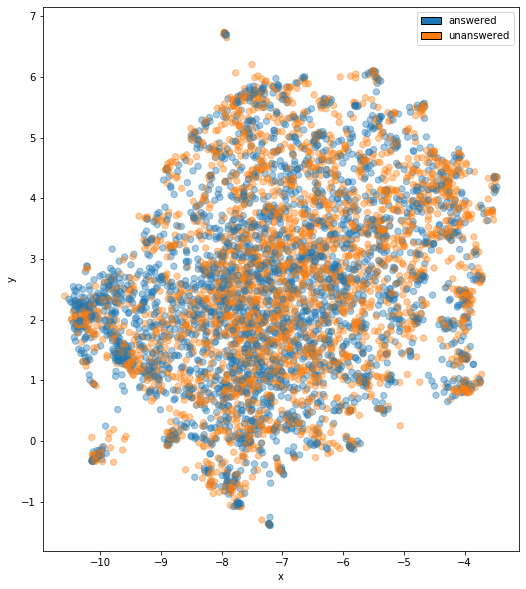

In [5]:
plot_embeddings(umap_bow, sent_labels)

#### Pre-Trained Word Embeddings

In [38]:
nlp = en_core_web_lg.load( disable=["parser", "tagger", "ner"])

spacy_emb = train_author[train_author['is_question']]['body_text'].apply(lambda x: nlp(x).vector)
embeddings = np.vstack(spacy_emb)

In [39]:
umap_embedder = umap.UMAP()
umap_emb = umap_embedder.fit_transform(embeddings)

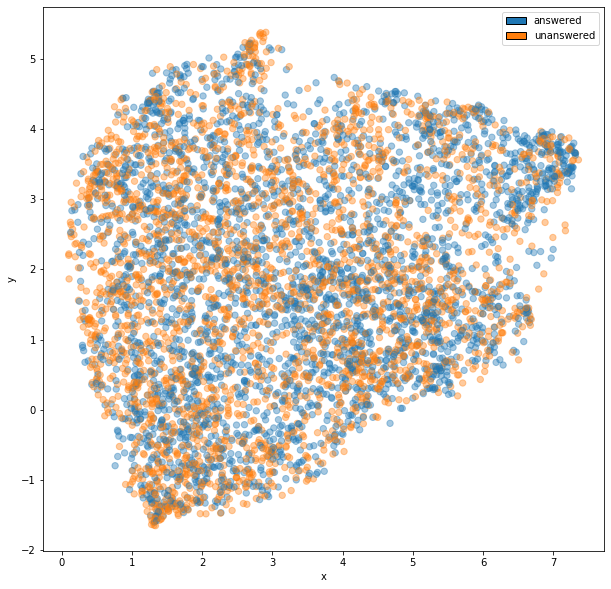

In [40]:
plot_embeddings(umap_emb, sent_labels)